In [48]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_json('salaries.json')

# Filter for employment_type = 'FT' and employee_residence = 'US'
df2 = df[(df['employment_type'] == 'FT') & (df['employee_residence'] == 'US')]

# Display the first few rows of the new DataFrame
df2.head()




,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Architect,185000,USD,185000,US,0,US,M
1,2023,SE,FT,Data Architect,150000,USD,150000,US,0,US,M
2,2023,SE,FT,Data Engineer,145000,USD,145000,US,0,US,M
3,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
4,2023,EN,FT,MLOps Engineer,133000,USD,133000,US,0,US,M


In [41]:
# Count the remote_ratio for the top 4 job titles in df2
# First, find the top 4 job titles
top_job_titles = df2['job_title'].value_counts().nlargest(4).index

# Filter df2 for only the top 4 job titles
top_jobs_df = df2[df2['job_title'].isin(top_job_titles)]

# Group by job title and remote_ratio, and count
remote_ratio_counts = top_jobs_df.groupby(['job_title', 'remote_ratio']).size().unstack(fill_value=0)

# Combine the counts for 50 and 100 into one count
remote_ratio_counts['Remote (50 or 100)'] = remote_ratio_counts[50] + remote_ratio_counts[100]
remote_ratio_counts = remote_ratio_counts.drop(columns=[50, 100])

top_jobs_df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,remote_category
2,2023,SE,FT,Data Engineer,145000,USD,145000,US,0,US,M,0
3,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M,0
19,2023,SE,FT,Data Engineer,230300,USD,230300,US,0,US,M,0
20,2023,SE,FT,Data Engineer,140000,USD,140000,US,0,US,M,0
23,2023,SE,FT,Data Scientist,224800,USD,224800,US,0,US,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9253,2021,MI,FT,Data Scientist,73000,USD,73000,US,0,US,L,0
9256,2020,MI,FT,Data Scientist,118000,USD,118000,US,100,US,M,Partial/Full Remote
9257,2020,MI,FT,Data Scientist,138350,USD,138350,US,100,US,M,Partial/Full Remote
9265,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,Partial/Full Remote


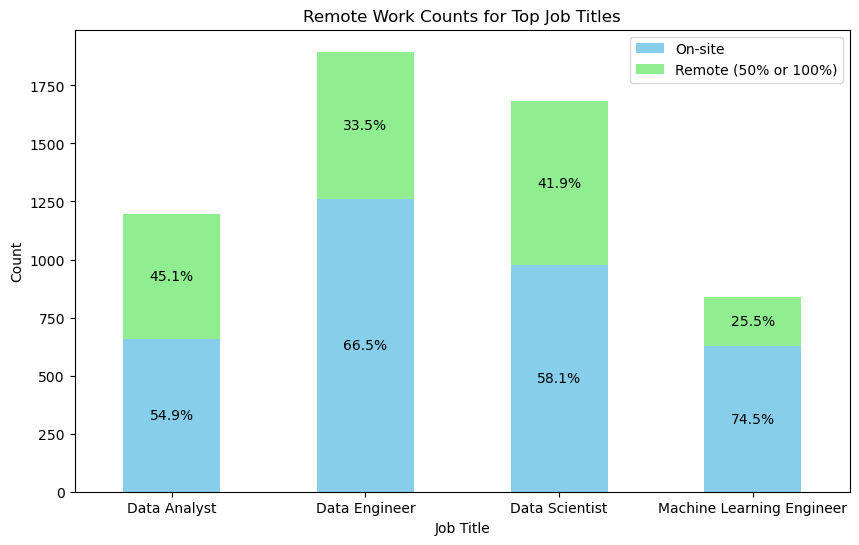

In [8]:
# Calculate the percentages for each section of the bar
remote_ratio_counts['Total'] = remote_ratio_counts[0] + remote_ratio_counts['Remote (50 or 100)']
remote_ratio_counts['% On-site'] = (remote_ratio_counts[0] / remote_ratio_counts['Total']) * 100
remote_ratio_counts['% Remote (50 or 100)'] = (remote_ratio_counts['Remote (50 or 100)'] / remote_ratio_counts['Total']) * 100

# Resetting the index of the DataFrame to use job titles as a regular column
remote_ratio_counts_reset = remote_ratio_counts.reset_index()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
remote_ratio_counts_reset[['job_title', 0, 'Remote (50 or 100)']].plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'], ax=ax, x='job_title')

# Annotate percentages on the bars
for idx, row in remote_ratio_counts_reset.iterrows():
    ax.text(idx, row[0]/2, f'{row["% On-site"]:.1f}%', ha='center', va='center', color='black')
    ax.text(idx, row[0] + row['Remote (50 or 100)']/2, f'{row["% Remote (50 or 100)"]:.1f}%', ha='center', va='center', color='black')

# Setting labels and title
ax.set_ylabel('Count')
ax.set_xlabel('Job Title')
ax.set_title('Remote Work Counts for Top Job Titles')
ax.legend(['On-site', 'Remote (50% or 100%)'])

# Display the chart
plt.xticks(rotation=0)
plt.show()

#export to png
fig.savefig('remote_work_counts.png')

plt.close()


In [4]:
# Grouping df2 by year and the top 4 job titles, and calculating the remote jobs percentages

# Filtering df2 for only the top 4 job titles
top_jobs_df_individual = df2[df2['job_title'].isin(top_job_titles)]

# Grouping by 'work_year' and 'job_title', then calculating the total and remote job counts
individual_yearly_data = top_jobs_df_individual.groupby(['work_year', 'job_title']).agg(
    Total_Jobs=('remote_ratio', 'count'),
    Remote_Jobs=('remote_ratio', lambda x: (x >= 50).sum())
)

# Calculating the percentage of remote jobs
individual_yearly_data['Remote_Job_Percentage'] = (individual_yearly_data['Remote_Jobs'] / individual_yearly_data['Total_Jobs']) * 100

individual_yearly_data.reset_index()


,work_year,job_title,Total_Jobs,Remote_Jobs,Remote_Job_Percentage
0,2020,Data Analyst,3,3,100.000000
1,2020,Data Engineer,3,3,100.000000
2,2020,Data Scientist,6,6,100.000000
3,2020,Machine Learning Engineer,3,3,100.000000
4,2021,Data Analyst,12,10,83.333333
5,2021,Data Engineer,19,15,78.947368
6,2021,Data Scientist,15,12,80.000000
7,2021,Machine Learning Engineer,4,4,100.000000
8,2022,Data Analyst,230,116,50.434783
9,2022,Data Engineer,409,189,46.210269


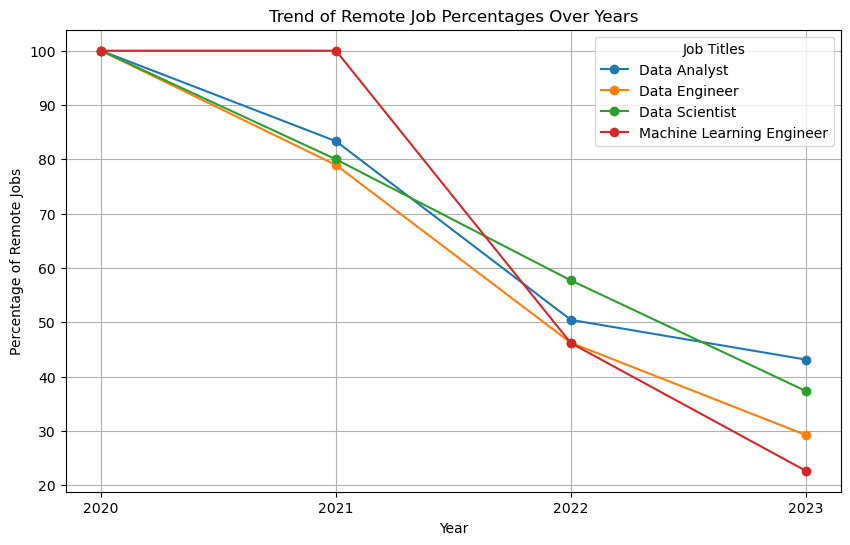

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

# Prepare data for line chart
line_chart_data = individual_yearly_data['Remote_Job_Percentage'].unstack(level=1)

# Create the line chart
plt.figure(figsize=(10, 6))
for job_title in line_chart_data.columns:
    plt.plot(line_chart_data.index, line_chart_data[job_title], marker='o', label=job_title)

plt.title('Trend of Remote Job Percentages Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Remote Jobs')
plt.xticks(line_chart_data.index)
plt.legend(title='Job Titles')
plt.grid(True)
plt.show()

#export to png
plt.savefig('remote_job_percentages.png')




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for line chart
line_chart_data = individual_yearly_data['Remote_Job_Percentage'].unstack(level=1)

# Create the line chart
plt.figure(figsize=(10, 6))

# Loop through each job title to create a model and make predictions
for job_title in line_chart_data.columns:
    # Extract the data for the current job title
    X = line_chart_data.index.values.reshape(-1, 1)  # Years
    y = line_chart_data[job_title].values  # Percentages

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict for 2024
    prediction_2024 = model.predict(np.array([[2024]]))[0]

    # Extend the line to include the prediction for 2024
    X_extended = np.append(X, [[2024]], axis=0)
    y_extended = np.append(y, prediction_2024)

    # Plotting the historical data and the prediction
    plt.plot(X_extended.flatten(), y_extended, marker='o', label=f'{job_title} (2024 Prediction: {prediction_2024:.2f}%)')

plt.title('Trend of Remote Job Percentages Over Years with 2024 Prediction')
plt.xlabel('Year')
plt.ylabel('Percentage of Remote Jobs')
plt.xticks(np.append(line_chart_data.index.values, 2024))  # Include 2024 in the x-axis
plt.legend(title='Job Titles')
plt.grid(True)
plt.show()

NameError: name 'individual_yearly_data' is not defined

In [10]:
# Calculating the average salary for each of the top 4 job titles over the last 4 years

# Grouping by 'work_year' and 'job_title', then calculating the average salary
average_salary_data = top_jobs_df_individual.groupby(['work_year', 'job_title']).agg(
    Average_Salary=('salary_in_usd', 'mean')
)

average_salary_data.reset_index()


,work_year,job_title,Average_Salary
0,2020,Data Analyst,82666.666667
1,2020,Data Engineer,134666.666667
2,2020,Data Scientist,166391.666667
3,2020,Machine Learning Engineer,179333.333333
4,2021,Data Analyst,94166.666667
5,2021,Data Engineer,135075.000000
6,2021,Data Scientist,112966.666667
7,2021,Machine Learning Engineer,147750.000000
8,2022,Data Analyst,116383.904348
9,2022,Data Engineer,151114.865526


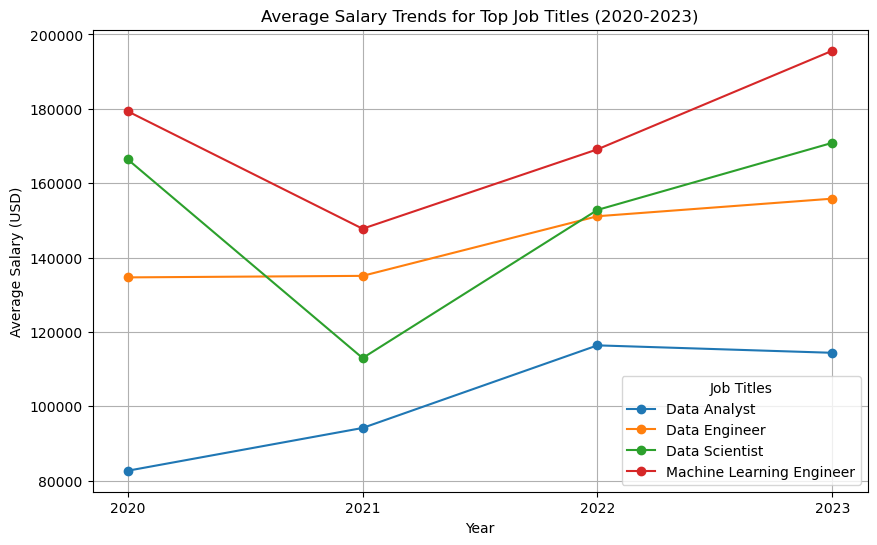

In [11]:
# Prepare data for the line chart showing average salary trends
line_chart_salary_data = average_salary_data['Average_Salary'].unstack(level=1)

# Create the line chart for average salaries
plt.figure(figsize=(10, 6))
for job_title in line_chart_salary_data.columns:
    plt.plot(line_chart_salary_data.index, line_chart_salary_data[job_title], marker='o', label=job_title)

plt.title('Average Salary Trends for Top Job Titles (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.xticks(line_chart_salary_data.index)
plt.legend(title='Job Titles')
plt.grid(True)
plt.show()


In [15]:
# Calculating the mean salary for each experience level and company size in the original df2 DataFrame

# Grouping by 'experience_level' and 'company_size', then calculating the mean salary
mean_salary_experience_company = df2.groupby(['experience_level', 'company_size']).agg(
    Mean_Salary=('salary_in_usd', 'mean')
)

mean_salary_experience_company


Mean_Salary
experience_level company_size               
EN               L             106069.090909
                 M             106145.818533
                 S              90857.142857
EX               L             258928.571429
                 M             192951.926407
                 S             193333.333333
MI               L             147647.720930
                 M             129584.928747
                 S             125653.846154
SE               L             173549.585000
                 M             165899.810216
                 S             142866.666667

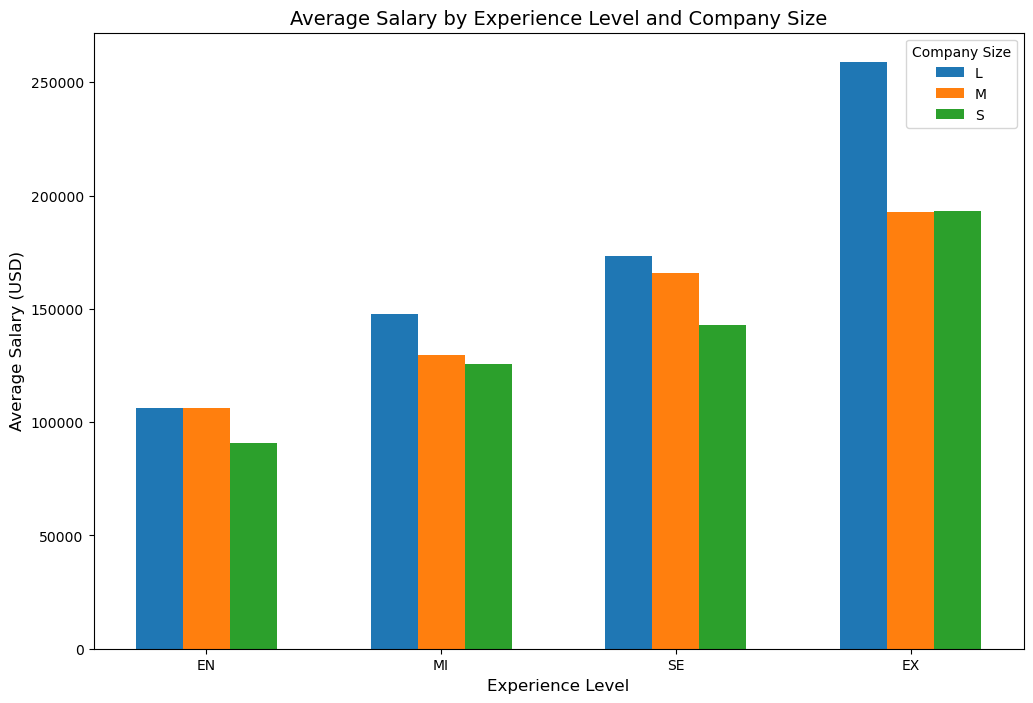

In [17]:
# Preparing data for the grouped bar chart
grouped_bar_chart_data = mean_salary_experience_company['Mean_Salary'].unstack(level=1).reset_index()

# Ordering the experience levels from EN, MI, SE to EX
experience_order = ['EN', 'MI', 'SE', 'EX']
grouped_bar_chart_data_ordered = grouped_bar_chart_data.set_index('experience_level').loc[experience_order].reset_index()

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.2
index = np.arange(len(grouped_bar_chart_data_ordered))

# Plotting each set of bars for each company size
for i, company_size in enumerate(grouped_bar_chart_data_ordered.columns[1:]):
    ax.bar(index + i*bar_width, grouped_bar_chart_data_ordered[company_size], bar_width, label=company_size)

# Setting the chart title and labels
ax.set_xlabel('Experience Level', fontsize=12)
ax.set_ylabel('Average Salary (USD)', fontsize=12)
ax.set_title('Average Salary by Experience Level and Company Size', fontsize=14)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(grouped_bar_chart_data_ordered['experience_level'])
ax.legend(title='Company Size')

# Showing the chart
plt.show()


In [26]:
job_title_stats = df2.groupby('job_title').agg({'salary_in_usd':['count', 'mean']})
top_job_titles = job_title_stats.sort_values(('salary_in_usd', 'count'), ascending=False).head(4)
top_job_titles = top_job_titles.reset_index()

job_title salary_in_usd               
                                     count           mean
0              Data Engineer          1895  154579.249604
1             Data Scientist          1683  166775.777778
2               Data Analyst          1198  114484.975793
3  Machine Learning Engineer           840  192880.919048

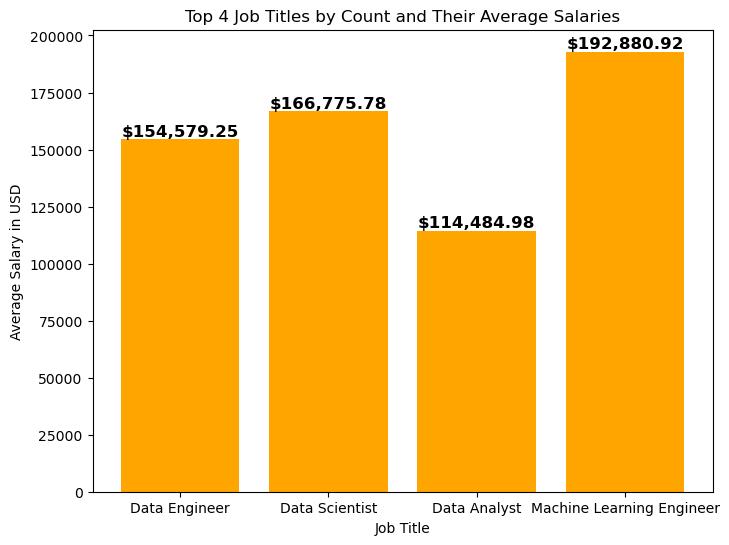

In [34]:
# Plotting with average salary values (as dollar amounts) on top of each bar
# Plotting with larger and bolder average salary values (as dollar amounts) on top of each bar
plt.figure(figsize=(8, 6))
bars = plt.bar(top_job_titles['job_title'], top_job_titles['salary_in_usd']['mean'], color='orange')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${round(yval, 2):,}', 
             va='bottom', ha='center', fontsize=12, fontweight='bold')

plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.title('Top 4 Job Titles by Count and Their Average Salaries')
plt.xticks(rotation=0)
plt.show()





In [35]:
# Combining 50 and 100 remote ratios into one count
df2['remote_category'] = df2['remote_ratio'].replace({50: 'Partial/Full Remote', 100: 'Partial/Full Remote'})

# Grouping the data by experience level and remote category
exp_level_remote_jobs = df2.groupby(['experience_level', 'remote_category']).size().unstack(fill_value=0)

# Displaying the result
exp_level_remote_jobs



/tmp/ipykernel_1274340/2450141292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['remote_category'] = df2['remote_ratio'].replace({50: 'Partial/Full Remote', 100: 'Partial/Full Remote'})


remote_category,0,Partial/Full Remote
experience_level,,
EN,189,128
EX,143,98
MI,890,430
SE,3834,2219


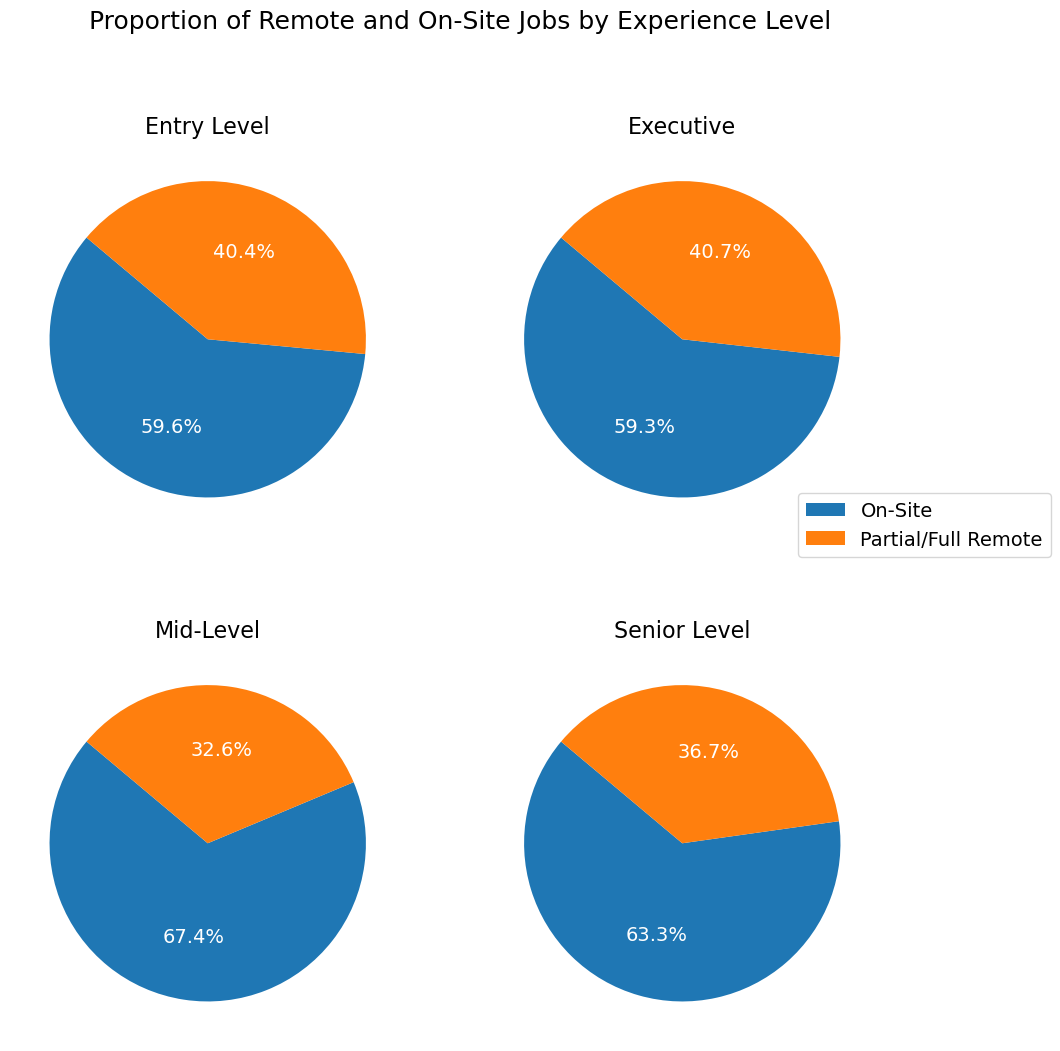

In [39]:
# Creating a multi-panel pie chart with improved labeling and larger percentage texts
exp_level_remote_jobs.columns = ['On-Site', 'Partial/Full Remote']

# Updating experience level labels for the pie charts
experience_level_labels = {'EN': 'Entry Level', 'EX': 'Executive', 'MI': 'Mid-Level', 'SE': 'Senior Level'}

# Recreating the multi-panel pie chart with updated experience level labels
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()  # Flattening the 2x2 grid into a linear array for easy iteration

for i, exp_level in enumerate(experience_levels):
    label = experience_level_labels[exp_level]
    wedges, texts, autotexts = axs[i].pie(exp_level_remote_jobs.loc[exp_level], autopct='%1.1f%%',
                                          startangle=140, textprops={'fontsize': 14})
    for autotext in autotexts:
        autotext.set_color('white')
    axs[i].set_title(label, fontsize=16)

fig.suptitle('Proportion of Remote and On-Site Jobs by Experience Level', fontsize=18)

# Updating the legend
fig.legend(wedges, exp_level_remote_jobs.columns, loc="center right", fontsize=14, title_fontsize=16)
plt.subplots_adjust(right=0.85)  # Adjusting layout to make space for the legend
plt.show()





In [43]:

# Grouping the data by job title and the combined remote category, then calculating the average salary
average_salary_combined_remote = top_jobs_df.groupby(['job_title', 'remote_category'])['salary_in_usd'].mean().unstack()

average_salary_combined_remote



remote_category,0,Partial/Full Remote
job_title,,
Data Analyst,116592.129179,111917.370370
Data Engineer,153733.138095,156258.148031
Data Scientist,169069.762538,163601.240793
Machine Learning Engineer,193479.212460,191130.771028


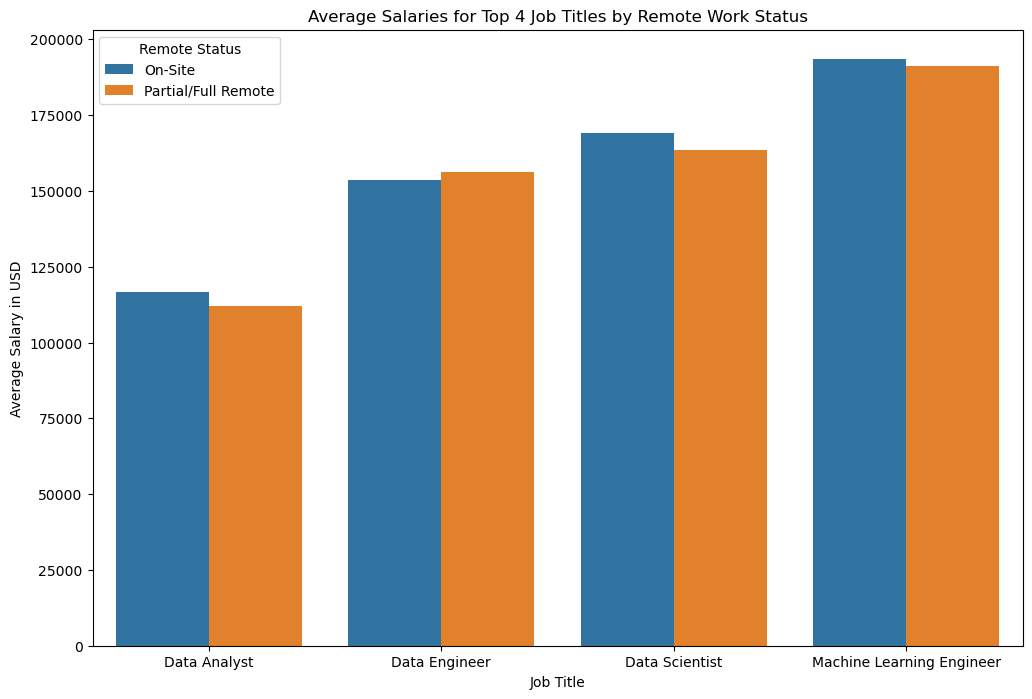

In [55]:
# Preparing data for plotting the grouped bar chart
plot_data = average_salary_combined_remote.reset_index()
plot_data_melted = plot_data.melt(id_vars='job_title', var_name='Remote Status', value_name='Average Salary')
#display(plot_data_melted)
plot_data_melted['Remote Status'] = plot_data_melted['Remote Status'].replace({0: 'On-Site'})

# Recreating the grouped bar chart with the updated data
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='job_title', y='Average Salary', hue='Remote Status', data=plot_data_melted)

plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.title('Average Salaries for Top 4 Job Titles by Remote Work Status')
plt.xticks(rotation=0)
plt.show()


